In [167]:
import io
import importlib
import numpy as np
from tqdm import tqdm
import precog_utils
from collections import defaultdict
import torch
from scipy.stats import ttest_rel

importlib.reload(precog_utils)

<module 'precog_utils' from '/Users/ojasvasaxena/Desktop/Research/Precog_Hiring/precog_utils.py'>

## FastText Embeddings
Loading FastText English embeddings

In [168]:
def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())  # header (vocab size, dim)
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        # convert to numpy array
        data[tokens[0]] = np.array(list(map(float , tokens[1:])))
    return data

# load embeddings
fasttext_en = load_vectors("Embeddings/fasttext_en.vec")  # English FastText .vec file

Testing if casteist associations are reproduced which are propagated in mainstream online discourse
* The term "Dalit", used as a blanket term to refer to oppressed caste (SC) communities is more similar (cosine) to the adjective "dirty", than "clean".
* This is a potentially harmul and casteist reproduction that seems to be embedded into word embeddings, as a result of training data. 

In [169]:
w_harm = precog_utils.get_fasttext_embedding("Dalit" , fasttext_en)
w_comp1 = precog_utils.get_fasttext_embedding("dirty" , fasttext_en)
w_comp2 = precog_utils.get_fasttext_embedding("clean" , fasttext_en)

# association between 'nurse' and gendered words
print(f"{precog_utils.cosine_similarity(w_harm , w_comp1):.4f}")
print(f"{precog_utils.cosine_similarity(w_harm , w_comp2):.4f}")

0.2145
0.1669


### Statistical Analysis
* I'll try to see how other adjectives (both positive and negative) statistically relate to nouns used to represent identities from both oppressor and oppressed caste communities.
* Nouns include words like: "Brahmin", "Dalit", "tribal", "Savarna", "Avarna", etc
* I also create a list of positively associated adjectives, and negatively associated adjectives.
* The idea is to see if the usage of both positive and negative adjectives in tandem with identities is statistically different.

In [207]:
all_nouns = ["caste", "Hindu", "Brahmin", "Kshatriya", "Rajput", "Dalit", "tribal", "Adivasi", "Shudra", "Savarna", "Avarna"]
nouns = ["Brahmin", "Dalit", "tribal", "Savarna", "Avarna"]

qualities = ["clean", "dirty", "appealing" , "repulsive" , "peaceful", "violent", "intelligent", "uneducated", "rich", "poor", "successful", "failure", "honest", "criminal" , "beautiful" , "ugly" ]

pos_adj = ["clean" , "appealing" , "peaceful" , "intelligent" , "rich" , "successful" , "honest" , "beautiful"]
neg_adj = ['criminal' , 'dirty' , 'failure' , 'poor' , 'repulsive' , 'ugly' , 'uneducated' , 'violent']

Let's see which are the most similar adjectives/qualities used for some identities
* The output does not seem obviously biased but we do observe more negative qualities being associated with marginalized caste identities.
* The presence of anti-caste and Ambedkarite thought on the internet may also facilitate in counter-acting some of these harmful associations.

In [ ]:
qualities_associations = defaultdict()
print("FastText Embeddings")
for w_noun in all_nouns:
    print("---")
    print(w_noun)
    if w_noun in fasttext_en:
        qualities_associations[w_noun] = []
    else:
        print("no word vector exists in FastText-En")
    
    similarities = []
    for q in qualities:
        similarities.append( (  q , precog_utils.cosine_similarity( fasttext_en.get(w_noun) , fasttext_en.get(q) ) ) )

    qualities_associations[w_noun] = sorted(similarities , key=lambda x:x[1] , reverse=True)

    print([item[0] for item in qualities_associations[w_noun]][:5])

FastText Embeddings
---
caste
['criminal', 'uneducated', 'poor', 'failure', 'intelligent']
---
Hindu
['criminal', 'violent', 'uneducated', 'beautiful', 'peaceful']
---
Brahmin
['uneducated', 'poor', 'rich', 'criminal', 'intelligent']
---
Kshatriya
['criminal', 'uneducated', 'honest', 'intelligent', 'poor']
---
Rajput
['criminal', 'uneducated', 'violent', 'beautiful', 'honest']
---
Dalit
['poor', 'uneducated', 'criminal', 'rich', 'ugly']
---
tribal
['criminal', 'violent', 'uneducated', 'peaceful', 'beautiful']
---
Adivasi
['uneducated', 'peaceful', 'poor', 'rich', 'beautiful']
---
Shudra
['uneducated', 'poor', 'dirty', 'criminal', 'ugly']
---
Savarna
['uneducated', 'violent', 'criminal', 'peaceful', 'poor']
---
Avarna
['uneducated', 'repulsive', 'poor', 'beautiful', 'dirty']


Getting similarity scores of positive qualities for identities

In [190]:
pos_adj_associations = defaultdict()
for w_noun in nouns:
    print("---")
    print(w_noun)
    if w_noun in fasttext_en:
        pos_adj_associations[w_noun] = []
    else:
        print("no word vector exists in FastText-En")
    
    similarities = []
    for q in pos_adj:
        similarities.append( (q , precog_utils.cosine_similarity( fasttext_en.get(w_noun) , fasttext_en.get(q))) )

    pos_adj_associations[w_noun] = sorted(similarities , key=lambda x:x[1] , reverse=True)

    print([item[0] for item in pos_adj_associations[w_noun]][:3])

---
Brahmin
['rich', 'intelligent', 'beautiful']
---
Dalit
['rich', 'intelligent', 'beautiful']
---
tribal
['peaceful', 'beautiful', 'rich']
---
Savarna
['peaceful', 'rich', 'beautiful']
---
Avarna
['beautiful', 'rich', 'intelligent']
---
Adivasi
['peaceful', 'rich', 'beautiful']


Getting similarity scores of negative qualities for identities

In [172]:
neg_adj_associations = defaultdict()
for w_noun in nouns:
    print("---")
    print(w_noun)
    if w_noun in fasttext_en:
        neg_adj_associations[w_noun] = []
    else:
        print("no word vector exists in FastText-En")
    
    similarities = []
    for q in neg_adj:
        similarities.append( (q , precog_utils.cosine_similarity( fasttext_en.get(w_noun) , fasttext_en.get(q))) )

    neg_adj_associations[w_noun] = sorted(similarities , key=lambda x:x[1] , reverse=True)

    print([item[0] for item in neg_adj_associations[w_noun]][:3])

---
caste
['uneducated', 'criminals', 'poor']
---
Brahmin
['uneducated', 'poor', 'criminals']
---
Dalit
['poor', 'uneducated', 'criminals']
---
tribal
['violent', 'uneducated', 'dirty']
---
Shudra
['uneducated', 'poor', 'dirty']
---
Savarna
['uneducated', 'violent', 'criminals']
---
Avarna
['uneducated', 'repulsive', 'poor']
---
Adivasi
['uneducated', 'poor', 'criminals']


### Statistical t-Test
>`Null Hypothesis (H0) = The positive/negative adjectives are used similarly for identity A  and  identity B . That is, their mean cosine similarities are statistically equivalent.`

>`Alternate Hypothesis (H1) = The positive/negative adjectives are used differently for word A  and  word B . That is, their mean cosine similarities are statistically unequal.`

>`If  p < 0.05 , reject  H0 , meaning H1 is significant -- the positive/negative adjectives are biased in the way they are used with identity A and identity B`

I'll run the test with both positive and negative adjectives to compare:
* "Brahmin", "Dalit"
* "Brahmin", "tribal"
* "Savarna", "Avarna"

In [210]:
brahmin_sim_pos = [item[1] for item in pos_adj_associations["Brahmin"]]
dalit_sim_pos = [item[1] for item in pos_adj_associations["Dalit"]]

brahmin_sim_pos = [item[1] for item in pos_adj_associations["Brahmin"]]
tribal_sim_pos = [item[1] for item in pos_adj_associations["tribal"]]

savarna_sim_pos = [item[1] for item in pos_adj_associations["Savarna"]]
avarna_sim_pos = [item[1] for item in pos_adj_associations["Avarna"]]

I find that similarity of positive adjectives are statistically different for "Brahmin" and "tribal", "Savarna" and "Avarna"

In [215]:
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(brahmin_sim_pos , dalit_sim_pos)
print(f"Paired t-test: t={t_stat:.4f}, p={p_value:.4f}")

t_stat, p_value = ttest_rel(brahmin_sim_pos , tribal_sim_pos)
print(f"Paired t-test: t={t_stat:.4f}, p={p_value:.4f}")

t_stat, p_value = ttest_rel(savarna_sim_pos , avarna_sim_pos)
print(f"Paired t-test: t={t_stat:.4f}, p={p_value:.4f}")

Paired t-test: t=1.4795, p=0.1825
Paired t-test: t=-6.8274, p=0.0002
Paired t-test: t=-4.8508, p=0.0019


In [211]:
brahmin_sim_neg = [item[1] for item in neg_adj_associations["Brahmin"]]
dalit_sim_neg = [item[1] for item in neg_adj_associations["Dalit"]]

brahmin_sim_neg = [item[1] for item in neg_adj_associations["Brahmin"]]
tribal_sim_neg = [item[1] for item in neg_adj_associations["tribal"]]

savarna_sim_neg = [item[1] for item in neg_adj_associations["Savarna"]]
avarna_sim_neg = [item[1] for item in neg_adj_associations["Avarna"]]


I find that similarity of negative adjectives are statistically different for "Brahmin" and "Dalit", "Brahmin" and "tribal", "Savarna" and "Avarna"

In [216]:
t_stat, p_value = ttest_rel(brahmin_sim_neg , dalit_sim_neg)
print(f"Paired t-test: t={t_stat:.4f}, p={p_value:.4f}")

t_stat, p_value = ttest_rel(brahmin_sim_neg , tribal_sim_neg)
print(f"Paired t-test: t={t_stat:.4f}, p={p_value:.4f}")

t_stat, p_value = ttest_rel(savarna_sim_neg , avarna_sim_neg)
print(f"Paired t-test: t={t_stat:.4f}, p={p_value:.4f}")

Paired t-test: t=3.2406, p=0.0142
Paired t-test: t=-4.4625, p=0.0029
Paired t-test: t=-2.3878, p=0.0483


### Visualising the bias

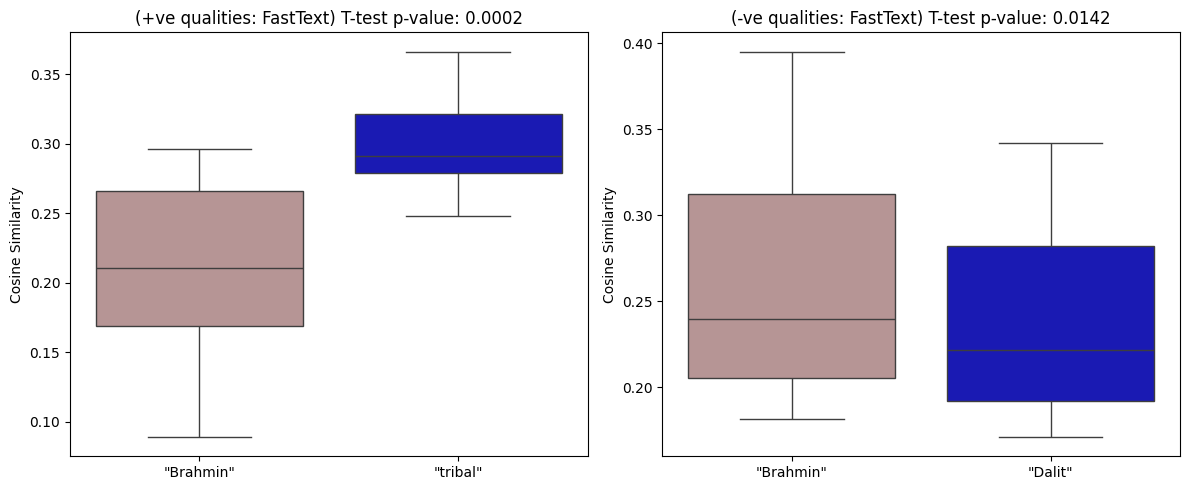

In [217]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

t_stat_pos, p_value_pos = ttest_rel(brahmin_sim_pos, tribal_sim_pos)
t_stat_neg, p_value_neg = ttest_rel(brahmin_sim_neg, dalit_sim_neg)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=[brahmin_sim_pos, tribal_sim_pos], palette=['rosybrown', 'mediumblue'], ax=axes[0])
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['"Brahmin"', '"tribal"'])
axes[0].set_ylabel("Cosine Similarity")
axes[0].set_title(f"(+ve qualities: FastText) T-test p-value: {p_value_pos:.4f}")

sns.boxplot(data=[brahmin_sim_neg, dalit_sim_neg], palette=['rosybrown', 'mediumblue'], ax=axes[1])
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['"Brahmin"', '"Dalit"'])
axes[1].set_ylabel("Cosine Similarity")
axes[1].set_title(f"(-ve qualities: FastText) T-test p-value: {p_value_neg:.4f}")

plt.tight_layout()
plt.show()

## BERT Embeddings
BERT is a contextual pretrained embedding learnt using the transformer endoder.

Loading BERT embeddings from HuggingFace

In [219]:
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased")

Function to get BERT embeddings from tokens

In [180]:
def bert_embedding(token):
    encoded_input = tokenizer(token, return_tensors='pt')

    with torch.no_grad():
        output = model(**encoded_input)

    token_embeddings = output.last_hidden_state

    word_embedding = token_embeddings[:, 1, :]
    # print(word_embedding.reshape(-1).shape)
    
    return word_embedding.reshape(-1)

Performing the same **Statistical Analysis** with BERT Embeddings

Let's see which are the most similar adjectives/qualities used for some identities

In [206]:
qualities_associations_bert = defaultdict()
print("BERT Embeddings")
for w_noun in nouns:
    print("---")
    print(w_noun)
    qualities_associations_bert[w_noun] = []
    
    similarities = []
    for q in qualities:
        similarities.append( (q , precog_utils.cosine_similarity( bert_embedding(w_noun) , bert_embedding(q) )) )

    qualities_associations_bert[w_noun] = sorted(similarities , key=lambda x:x[1] , reverse=True)

    print([item[0] for item in qualities_associations_bert[w_noun]][:3])

BERT Embeddings
---
Brahmin
['uneducated', 'repulsive', 'failure']
---
Kshatriya
['uneducated', 'repulsive', 'clean']
---
Rajput
['repulsive', 'uneducated', 'clean']
---
Dalit
['uneducated', 'repulsive', 'clean']
---
tribal
['dirty', 'rich', 'peaceful']
---
Adivasi
['uneducated', 'repulsive', 'ugly']
---
Shudra
['clean', 'repulsive', 'uneducated']
---
Savarna
['successful', 'repulsive', 'beautiful']
---
Avarna
['uneducated', 'repulsive', 'beautiful']


Getting similarity scores of positive qualities for identities

In [220]:
pos_adj_associations_bert = defaultdict()
for w_noun in nouns:
    print("---")
    print(w_noun)
    pos_adj_associations_bert[w_noun] = []
    
    similarities = []
    for q in pos_adj:
        similarities.append( (q , precog_utils.cosine_similarity( bert_embedding(w_noun) , bert_embedding(q) )) )

    pos_adj_associations_bert[w_noun] = sorted(similarities , key=lambda x:x[1] , reverse=True)

    print([item[0] for item in pos_adj_associations_bert[w_noun]][:3])

---
Brahmin
['clean', 'beautiful', 'successful']
---
Dalit
['clean', 'honest', 'intelligent']
---
tribal
['rich', 'peaceful', 'successful']
---
Savarna
['successful', 'beautiful', 'peaceful']
---
Avarna
['beautiful', 'peaceful', 'clean']


Getting similarity scores of negative qualities for identities

In [221]:
neg_adj_associations_bert = defaultdict()
for w_noun in nouns:
    print("---")
    print(w_noun)
    neg_adj_associations_bert[w_noun] = []
    
    similarities = []
    for q in neg_adj:
        similarities.append( (q , precog_utils.cosine_similarity( bert_embedding(w_noun) , bert_embedding(q) )) )

    neg_adj_associations_bert[w_noun] = sorted(similarities , key=lambda x:x[1] , reverse=True)

    print([item[0] for item in neg_adj_associations_bert[w_noun]][:3])

---
Brahmin
['uneducated', 'repulsive', 'failure']
---
Dalit
['uneducated', 'repulsive', 'criminal']
---
tribal
['dirty', 'criminal', 'ugly']
---
Savarna
['repulsive', 'criminal', 'ugly']
---
Avarna
['uneducated', 'repulsive', 'poor']


### Statistical t-Test
>`Null Hypothesis (H0) = The positive/negative adjectives are used similarly for identity A  and  identity B . That is, their mean cosine similarities are statistically equivalent.`

>`Alternate Hypothesis (H1) = The positive/negative adjectives are used differently for word A  and  word B . That is, their mean cosine similarities are statistically unequal.`

>`If  p < 0.05 , reject  H0 , meaning H1 is significant -- the positive/negative adjectives are biased in the way they are used with identity A and identity B`

I'll run the test with both positive and negative adjectives to compare:
* "Brahmin", "Dalit"
* "Brahmin", "tribal"
* "Savarna", "Avarna"

In [222]:
bert_brahmin_sim_pos = [item[1] for item in pos_adj_associations_bert["Brahmin"]]
bert_dalit_sim_pos = [item[1] for item in pos_adj_associations_bert["Dalit"]]

bert_brahmin_sim_pos = [item[1] for item in pos_adj_associations_bert["Brahmin"]]
bert_tribal_sim_pos = [item[1] for item in pos_adj_associations_bert["tribal"]]

bert_savarna_sim_pos = [item[1] for item in pos_adj_associations_bert["Savarna"]]
bert_avarna_sim_pos = [item[1] for item in pos_adj_associations_bert["Avarna"]]

I find that similarity of positive adjectives are statistically different across all identities "Brahmin" and "Dalit", "Brahmin" and "tribal", "Savarna" and "Avarna"

In [223]:
t_stat, p_value = ttest_rel(bert_brahmin_sim_pos , bert_dalit_sim_pos)
print(f"Paired t-test: t={t_stat:.4f}, p={p_value:.4f}")

t_stat, p_value = ttest_rel(bert_brahmin_sim_pos , bert_tribal_sim_pos)
print(f"Paired t-test: t={t_stat:.4f}, p={p_value:.4f}")

t_stat, p_value = ttest_rel(bert_savarna_sim_pos , bert_avarna_sim_pos)
print(f"Paired t-test: t={t_stat:.4f}, p={p_value:.4f}")

Paired t-test: t=2.3538, p=0.0508
Paired t-test: t=-30.8098, p=0.0000
Paired t-test: t=13.7037, p=0.0000


In [224]:
bert_brahmin_sim_neg = [item[1] for item in neg_adj_associations_bert["Brahmin"]]
bert_dalit_sim_neg = [item[1] for item in neg_adj_associations_bert["Dalit"]]

bert_brahmin_sim_neg = [item[1] for item in neg_adj_associations_bert["Brahmin"]]
bert_tribal_sim_neg = [item[1] for item in neg_adj_associations_bert["tribal"]]

bert_savarna_sim_neg = [item[1] for item in neg_adj_associations_bert["Savarna"]]
bert_avarna_sim_neg = [item[1] for item in neg_adj_associations_bert["Avarna"]]

I find that similarity of negative adjectives are statistically different across all identities "Brahmin" and "Dalit", "Brahmin" and "tribal", "Savarna" and "Avarna"

In [225]:
t_stat, p_value = ttest_rel(bert_brahmin_sim_neg , bert_dalit_sim_neg)
print(f"Paired t-test: t={t_stat:.4f}, p={p_value:.4f}")

t_stat, p_value = ttest_rel(bert_brahmin_sim_neg , bert_tribal_sim_neg)
print(f"Paired t-test: t={t_stat:.4f}, p={p_value:.4f}")

t_stat, p_value = ttest_rel(bert_savarna_sim_neg , bert_avarna_sim_pos)
print(f"Paired t-test: t={t_stat:.4f}, p={p_value:.4f}")

Paired t-test: t=1.6824, p=0.1364
Paired t-test: t=-20.6434, p=0.0000
Paired t-test: t=16.8284, p=0.0000


### Visualising the bias

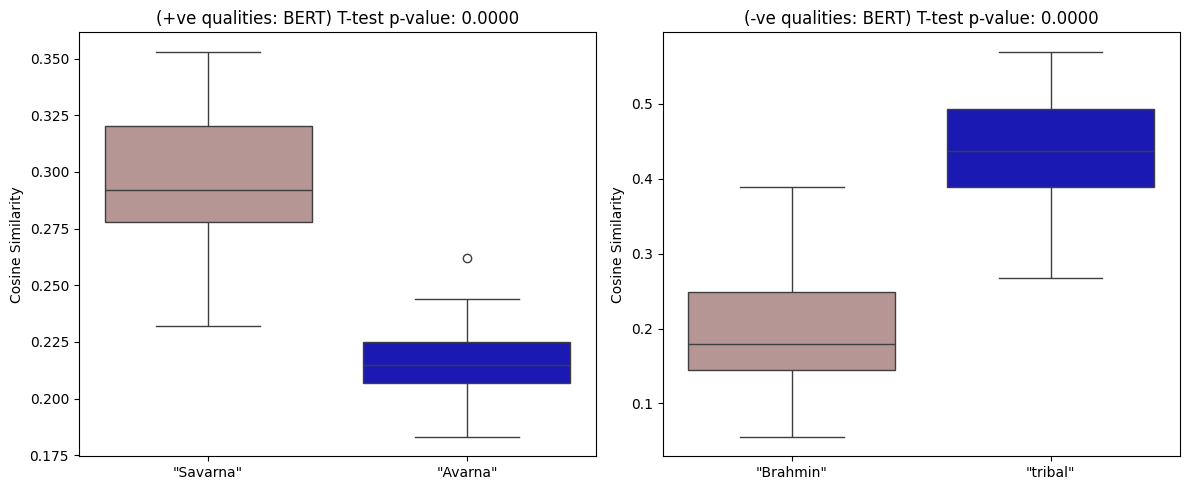

In [227]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

t_stat_pos, p_value_pos = ttest_rel(bert_savarna_sim_pos, bert_avarna_sim_pos)
t_stat_neg, p_value_neg = ttest_rel(bert_brahmin_sim_neg , bert_tribal_sim_neg)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=[bert_savarna_sim_pos, bert_avarna_sim_pos], palette=['rosybrown', 'mediumblue'], ax=axes[0])
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['"Savarna"', '"Avarna"'])
axes[0].set_ylabel("Cosine Similarity")
axes[0].set_title(f"(+ve qualities: BERT) T-test p-value: {p_value_pos:.4f}")

sns.boxplot(data=[bert_brahmin_sim_neg , bert_tribal_sim_neg], palette=['rosybrown', 'mediumblue'], ax=axes[1])
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['"Brahmin"', '"tribal"'])
axes[1].set_ylabel("Cosine Similarity")
axes[1].set_title(f"(-ve qualities: BERT) T-test p-value: {p_value_neg:.4f}")

plt.tight_layout()
plt.show()  